# To predict whether an applicant will commit credit card fraud or not.

We are required to create a model to identify the key factors that are involved with whether or not a credit card fraud will occured. It will be used by the management to understand how exactly the loan status vary with the independent variables. They can accordingly manipulate the business strategy. The model will be a good way for management to understand the business strategy since we don't want to grant credit card to applicants who are unable to repay them, As it would hurt the company.

In [1]:
import pandas as pd
import numpy as np
# visualisation
import seaborn as sns
import missingno as msno
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
df=pd.read_csv('DATA (2).csv')

In [3]:
#Viewing the rows and columns of the dataset
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Checking the summary for the numeric columns
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
#Name of the columns present in the dataset
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
#Calculating the missing value percentage
Missing_value_percentage=df.isna().sum()*100/307511
Missing_value_percentage

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [7]:
#Making list of the columns having more than 40% missing values
null = df.columns[Missing_value_percentage>40].tolist()
null

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [8]:
#Number of columns with more than 40% missing values
len(null)

49

In [9]:
#Dropping the 'null' columns from the dataset
df=df.drop(null,axis=1)

In [10]:
#Viewing the rows and columns of the dataset
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#Checking the missing value percentage of first 40 columns
df.iloc[:,:40].isnull().sum()/df.shape[0]*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [12]:
#Checking the missing value percentage of remaining columns
df.iloc[:,40:].isnull().sum() / df.shape[0] * 100.00

EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_12               0.000000
FLAG_DOCUMENT_13               0.000000
FLAG_DOCUMENT_14               0.000000
FLAG_DOCUMENT_15               0.000000
FLAG_DOCUMENT_16               0.000000
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_19               0.000000


## Handling the Missing Values

In [13]:
#Occupation Type Column (Replacing with XNA)
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('XNA')

In [14]:
#Ext Source (Mean)
df['EXT_SOURCE_3'] = df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean())

In [15]:
#AMT_REQ_CREDIT_BUREAU (Mode)
df['AMT_REQ_CREDIT_BUREAU_HOUR'] = df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0])
df['AMT_REQ_CREDIT_BUREAU_DAY'] = df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0])
df['AMT_REQ_CREDIT_BUREAU_WEEK'] = df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0])
df['AMT_REQ_CREDIT_BUREAU_MON'] = df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df.AMT_REQ_CREDIT_BUREAU_MON.mode()[0])
df['AMT_REQ_CREDIT_BUREAU_QRT'] = df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0])
df['AMT_REQ_CREDIT_BUREAU_YEAR'] = df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0])

In [16]:
#Replacing XNA in CODE_GENDER with mode
df['CODE_GENDER'] = df['CODE_GENDER'].replace('XNA',df.CODE_GENDER.mode()[0])

In [17]:
#Checking the missing value percentage of first 40 columns
df.iloc[:,:40].isnull().sum()/df.shape[0]*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [18]:
#Checking the missing value percentage of remaining columns
df.iloc[:,40:].isnull().sum()/df.shape[0]*100

EXT_SOURCE_2                  0.214626
EXT_SOURCE_3                  0.000000
OBS_30_CNT_SOCIAL_CIRCLE      0.332021
DEF_30_CNT_SOCIAL_CIRCLE      0.332021
OBS_60_CNT_SOCIAL_CIRCLE      0.332021
DEF_60_CNT_SOCIAL_CIRCLE      0.332021
DAYS_LAST_PHONE_CHANGE        0.000325
FLAG_DOCUMENT_2               0.000000
FLAG_DOCUMENT_3               0.000000
FLAG_DOCUMENT_4               0.000000
FLAG_DOCUMENT_5               0.000000
FLAG_DOCUMENT_6               0.000000
FLAG_DOCUMENT_7               0.000000
FLAG_DOCUMENT_8               0.000000
FLAG_DOCUMENT_9               0.000000
FLAG_DOCUMENT_10              0.000000
FLAG_DOCUMENT_11              0.000000
FLAG_DOCUMENT_12              0.000000
FLAG_DOCUMENT_13              0.000000
FLAG_DOCUMENT_14              0.000000
FLAG_DOCUMENT_15              0.000000
FLAG_DOCUMENT_16              0.000000
FLAG_DOCUMENT_17              0.000000
FLAG_DOCUMENT_18              0.000000
FLAG_DOCUMENT_19              0.000000
FLAG_DOCUMENT_20         

In [19]:
#Dropping rows with less than 0.5% missing values (AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, CNT_FAM_MEMBERS, EXT_SOURCE_2, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE & DAYS_LAST_PHONE_CHANGE)
df = df.dropna()

We observed that 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE' Columns had negative values.
So, we imputed them with absolute values for our analysis.

In [20]:
df[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0
...,...,...,...,...,...
307506,-9327,-236,-8456.0,-1982,-273.0
307507,-20775,365243,-4388.0,-4090,0.0
307508,-14966,-7921,-6737.0,-5150,-1909.0
307509,-11961,-4786,-2562.0,-931,-322.0


In [21]:
#Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive
day_cols = [i for i in df if i.startswith('DAYS')]
df[day_cols]= abs(df[day_cols])
print(df[day_cols])

        DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0             9461            637             3648.0             2120   
1            16765           1188             1186.0              291   
2            19046            225             4260.0             2531   
3            19005           3039             9833.0             2437   
4            19932           3038             4311.0             3458   
...            ...            ...                ...              ...   
307506        9327            236             8456.0             1982   
307507       20775         365243             4388.0             4090   
307508       14966           7921             6737.0             5150   
307509       11961           4786             2562.0              931   
307510       16856           1262             5128.0              410   

        DAYS_LAST_PHONE_CHANGE  
0                       1134.0  
1                        828.0  
2                       

In [22]:
#Changing "Y" and "N" with 1 and 0 for columns FLAG_OWN_CAR & FLAG_OWN_REALTY
df['FLAG_OWN_CAR'] = np.where(df['FLAG_OWN_CAR']=='Y', 1 , 0)
df['FLAG_OWN_REALTY'] = np.where(df['FLAG_OWN_REALTY']=='Y', 1 , 0)

In [23]:
#Concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   304531 non-null  int64  
 1   TARGET                       304531 non-null  int64  
 2   NAME_CONTRACT_TYPE           304531 non-null  object 
 3   CODE_GENDER                  304531 non-null  object 
 4   FLAG_OWN_CAR                 304531 non-null  int32  
 5   FLAG_OWN_REALTY              304531 non-null  int32  
 6   CNT_CHILDREN                 304531 non-null  int64  
 7   AMT_INCOME_TOTAL             304531 non-null  float64
 8   AMT_CREDIT                   304531 non-null  float64
 9   AMT_ANNUITY                  304531 non-null  float64
 10  AMT_GOODS_PRICE              304531 non-null  float64
 11  NAME_TYPE_SUITE              304531 non-null  object 
 12  NAME_INCOME_TYPE             304531 non-null  object 
 13 

# Binning of continuous variables

In [24]:
#Binning 'AMT_INCOME_TOTAL' to AMT_INCOME_TYPE based on quantiles
df['AMT_INCOME_TYPE'] = pd.qcut(df.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df['AMT_INCOME_TYPE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [25]:
#Binning 'AMT_CREDIT' to 'AMT_CREDIT_TYPE' based on quantiles
df['AMT_CREDIT_TYPE'] = pd.qcut(df.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df['AMT_CREDIT_TYPE'].head(11)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5           LOW
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
Name: AMT_CREDIT_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [26]:
#Binning 'DAYS_BIRTH' column by converting it to years based on various "AGE_GROUP"
df['DAYS_BIRTH']= (df['DAYS_BIRTH']/365).astype(int)    # Converting
df['DAYS_BIRTH'].unique()
df['AGE_GROUP']=pd.cut(df['DAYS_BIRTH'],
bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [27]:
df[['DAYS_BIRTH','AGE_GROUP']].head()

,DAYS_BIRTH,AGE_GROUP
0,25,Very_Young
1,45,Middle_Age
2,52,Middle_Age
3,52,Middle_Age
4,54,Middle_Age


# UNIVARIATE ANALYSIS

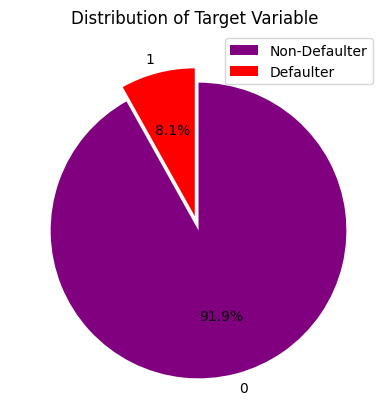

In [29]:
import matplotlib.pyplot as plt
target_freq=df['TARGET'].value_counts()
plt.pie(target_freq, labels=target_freq.index,autopct='%1.1f%%', startangle=90, counterclock=False,colors=['purple','red'],explode=[0.1, 0])
plt.title('Distribution of Target Variable')
plt.legend(['Non-Defaulter','Defaulter'])
plt.show()

The dataset is highly imbalanced.

The population of defaulters is 8.1 % and population of non-defaulters is 91.9% .

In [30]:
#Concise summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   304531 non-null  int64   
 1   TARGET                       304531 non-null  int64   
 2   NAME_CONTRACT_TYPE           304531 non-null  object  
 3   CODE_GENDER                  304531 non-null  object  
 4   FLAG_OWN_CAR                 304531 non-null  int32   
 5   FLAG_OWN_REALTY              304531 non-null  int32   
 6   CNT_CHILDREN                 304531 non-null  int64   
 7   AMT_INCOME_TOTAL             304531 non-null  float64 
 8   AMT_CREDIT                   304531 non-null  float64 
 9   AMT_ANNUITY                  304531 non-null  float64 
 10  AMT_GOODS_PRICE              304531 non-null  float64 
 11  NAME_TYPE_SUITE              304531 non-null  object  
 12  NAME_INCOME_TYPE             304531 non-null

In [31]:
#List of numerical columns in the dataset
numerical_col = df.select_dtypes(include='number').columns
len(numerical_col)

63

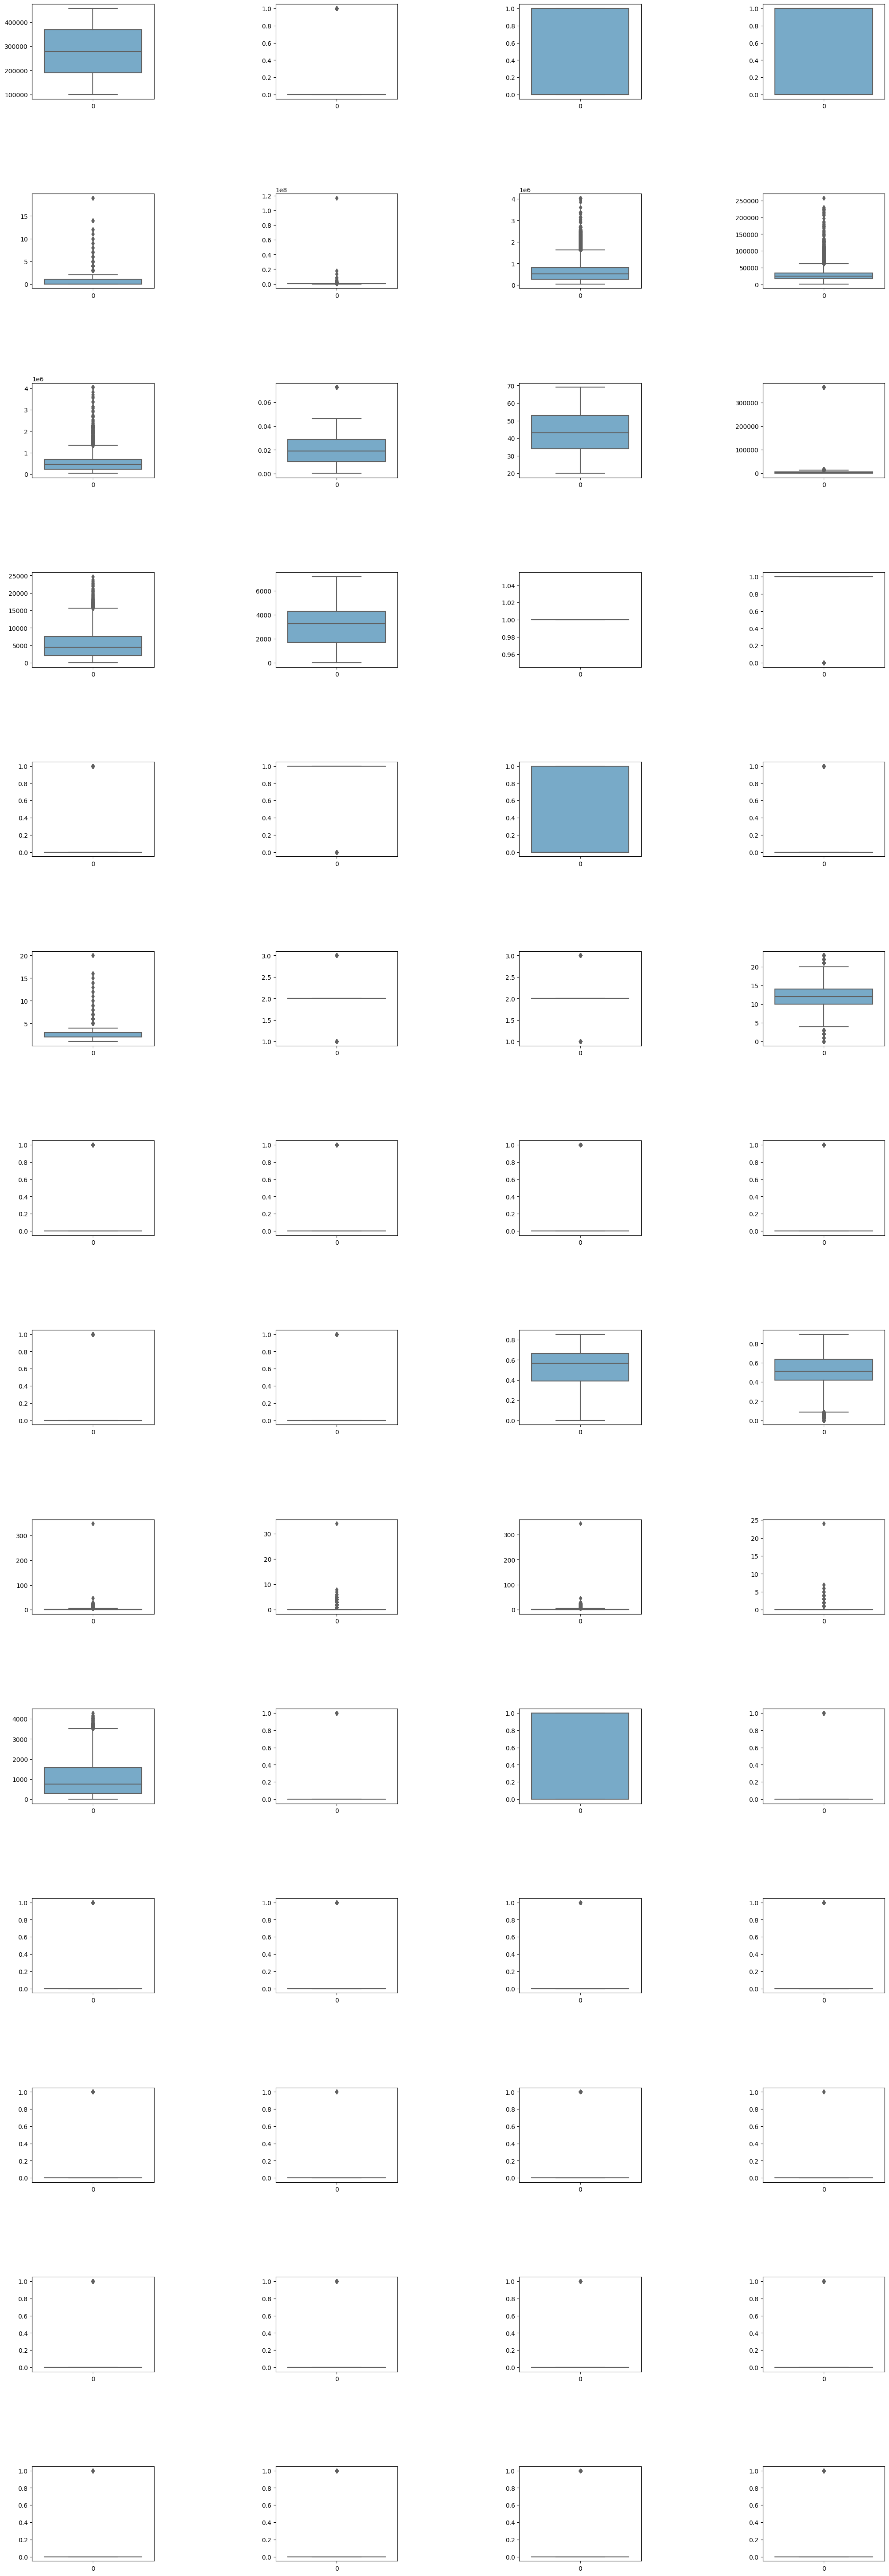

In [32]:
# Boxplots distribution for each numerical_col using *"for"* loop
fig , axes = plt.subplots(nrows=14, ncols=4) # Plot Configuration
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=1, hspace=1)
for ax, column in zip(axes.flatten(),numerical_col):        #Using For loop
    sns.boxplot(df[column],ax=ax,palette='Blues')   #Ploting

CNT_CHILDREN have outlier values having children more than 5.

IQR for AMT_INCOME_TOTAL is very slim and it have a large number of outliers.

Third quartile of AMT_CREDIT is larger as compared to First quartile which means that most of the Credit amount of the loan of customers are present in the third quartile.And there are large number of outliers present in AMT_CREDIT.

Third quartile of AMT_ANNUITY is slightly larger than First quartile and there are large number of outliers.

Third quartile of AMT_GOODS_PRICE,DAYS_REGISTRATION AND DAYS_LAST_PHONE_CHANGE is larger as compared to First quartile and all have a large number of outliers.

IQR for DAYS EMPLOYED is very slim.Most of the outliers are present below 25000.And a outlier is present 375000.

From boxplot of CNT_FAM_MEMBERS ,we can say that most of the clients have 4 family members.There are some outliers present.
DAYS_BIRTH ,DAYS_ID_PUBLISH and EXT_SOURCE_2,EXT_SOURCE_3 don't have any outliers.

Boxplot for DAYS_EMPLOYED ,OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT and AMT_REQ_CREDIT_BUREAU_YEARare very slim and have a large number of outliers.

FLAG_OWN_CAR : It doesn't have First and Third quantile and values lies within IQR,So we can conclude that,most of the clients do not own a car.

FLAG_OWN_REALTY : It doesn't have First and Third quantile and values lies within IQR,So we can conclude that,most of the clients own a Realty

# BIVARIATE ANALYSIS

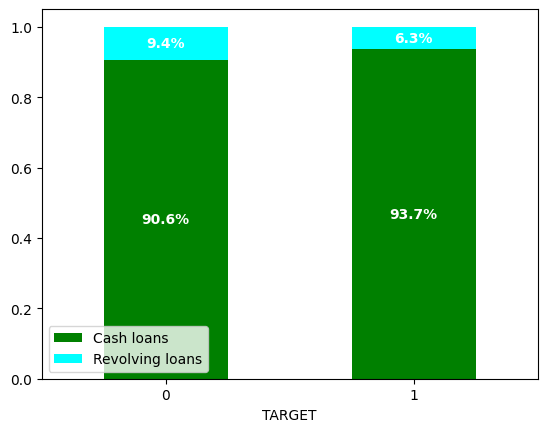

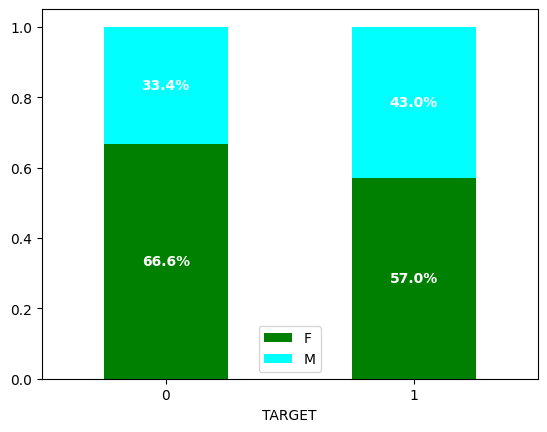

In [33]:
for i in ['NAME_CONTRACT_TYPE','CODE_GENDER']:
    crosstab = pd.crosstab(df['TARGET'],df[i], normalize='index')
    ax=crosstab.plot(kind='bar', stacked=True, rot=0,color=['green', 'cyan'])
    for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x()+p.get_width()/2, p.get_y()+p.get_height()/2),
                ha='center', va='center', fontsize=10, color='white', fontweight='bold')
    plt.legend()

Majority of the Defaulters applied for Cash Loans.

It seems like Female clients applied higher than male clients for loan.

66.6% Female clients are non-defaulters while 33.4% male clients are non-defaulters.

57% Female clients are defaulters while 42% male clients are defaulters.

In [34]:
df['FLAG_OWN_REALTY'].value_counts()

1    211641
0     92890
Name: FLAG_OWN_REALTY, dtype: int64

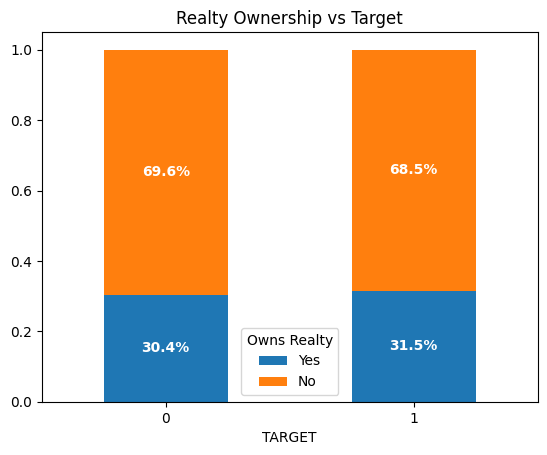

In [35]:
crosstab = pd.crosstab(df['TARGET'],df['FLAG_OWN_REALTY'], normalize='index')
ax=crosstab.plot(kind='bar', stacked=True, rot=0)
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x()+p.get_width()/2, p.get_y()+p.get_height()/2),
                ha='center', va='center', fontsize=10, color='white', fontweight='bold')
plt.title('Realty Ownership vs Target')
plt.legend(['Yes','No'],title='Owns Realty')
plt.show()

Most of the clients owns a Realty. Out of total defaulters, 31.5% have realty.

In [36]:
df['FLAG_OWN_CAR'].value_counts()

0    200910
1    103621
Name: FLAG_OWN_CAR, dtype: int64

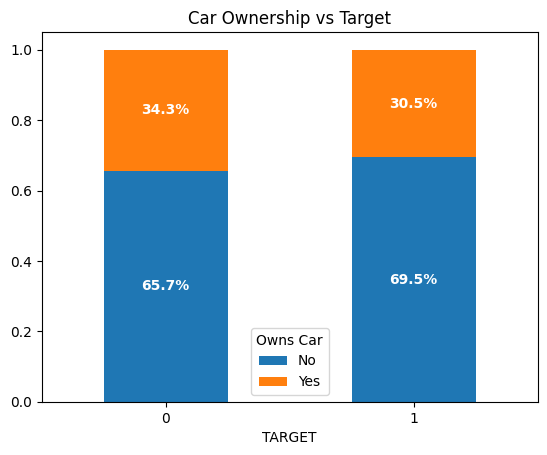

In [37]:
crosstab = pd.crosstab(df['TARGET'],df['FLAG_OWN_CAR'], normalize='index')
ax=crosstab.plot(kind='bar', stacked=True, rot=0)
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x()+p.get_width()/2, p.get_y()+p.get_height()/2),
                ha='center', va='center', fontsize=10, color='white', fontweight='bold')
plt.title('Car Ownership vs Target')
plt.legend(['No','Yes'],title='Owns Car')
plt.show()

Majority of the clients do not own a car.
Out of total defaulters, 30.5% have cars.

<Axes: xlabel='TARGET', ylabel='count'>

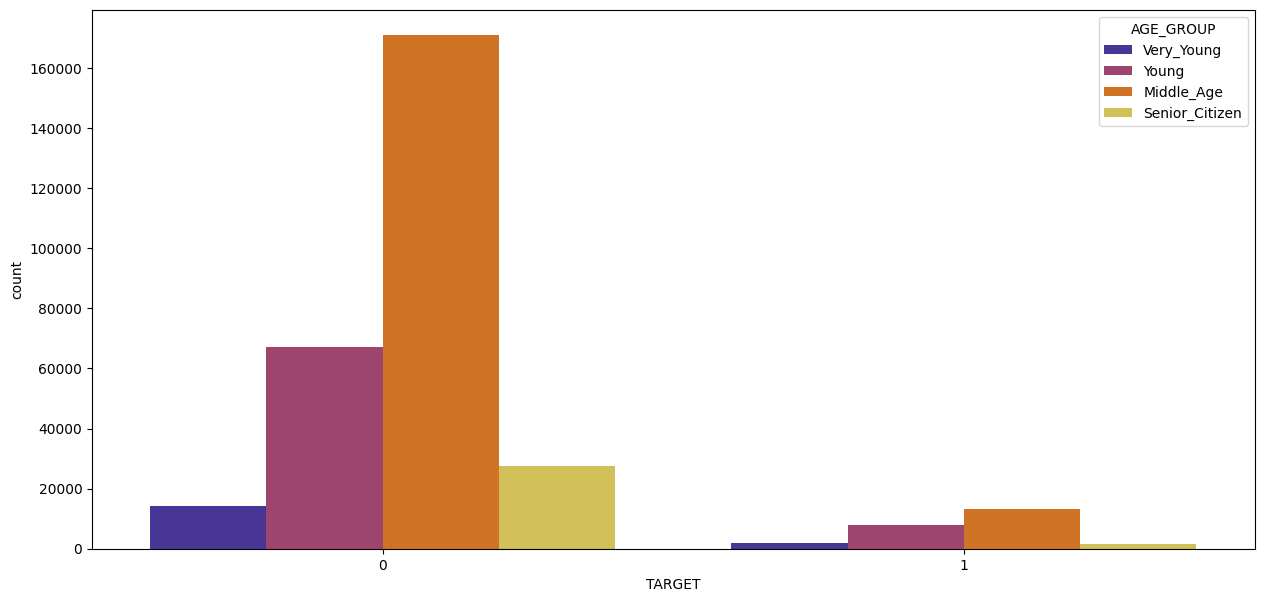

In [38]:
plt.figure(figsize=(15,7))
sns.countplot(x=df.TARGET,hue=df.AGE_GROUP,palette='CMRmap')

Middle Age(35-60) group seems to applied higher than any other age group for loan in case of Defaulters as well as Non-defaulters.

Also , Middle Age group faces difficulties in paying the most.

While Senior Citizens(60-100) and Very young(19-25) age group facing paying difficulties are less as compared to other age groups.

<Axes: xlabel='TARGET', ylabel='count'>

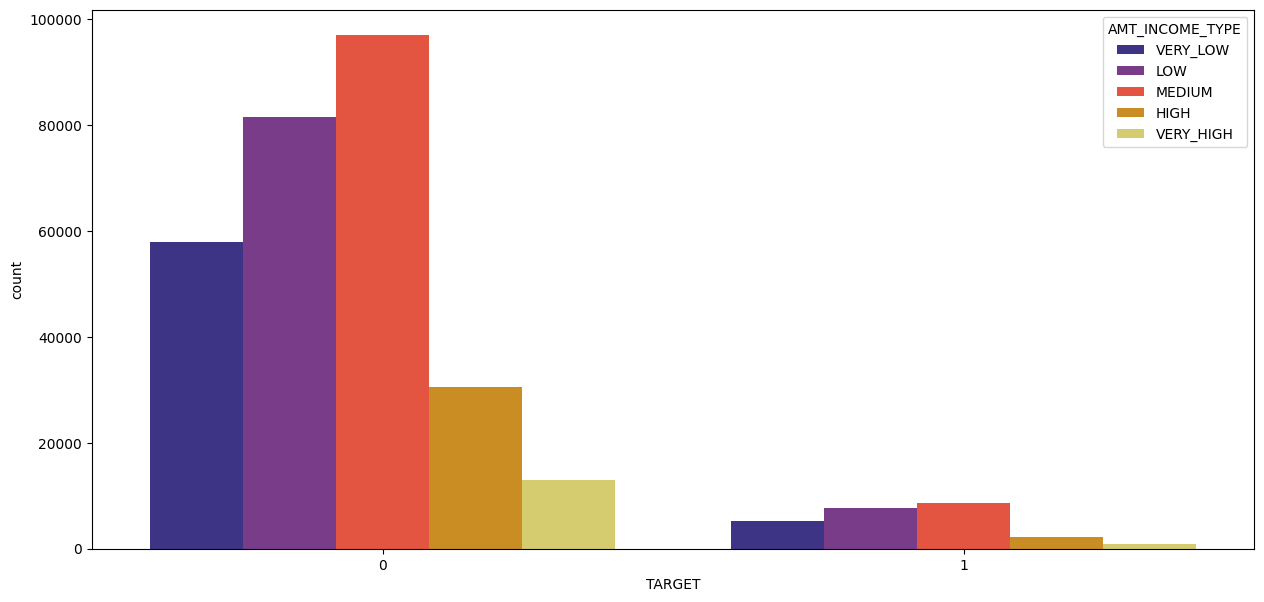

In [39]:
plt.figure(figsize=(15,7))
sns.countplot(x=df.TARGET,hue=df.AMT_INCOME_TYPE,palette='CMRmap')

Clients having Medium salary range are more likely to apply for the loan for both Defaulters and Non-defaulters.

Clients having low and medium income are at high risk to default.

<Axes: xlabel='TARGET', ylabel='count'>

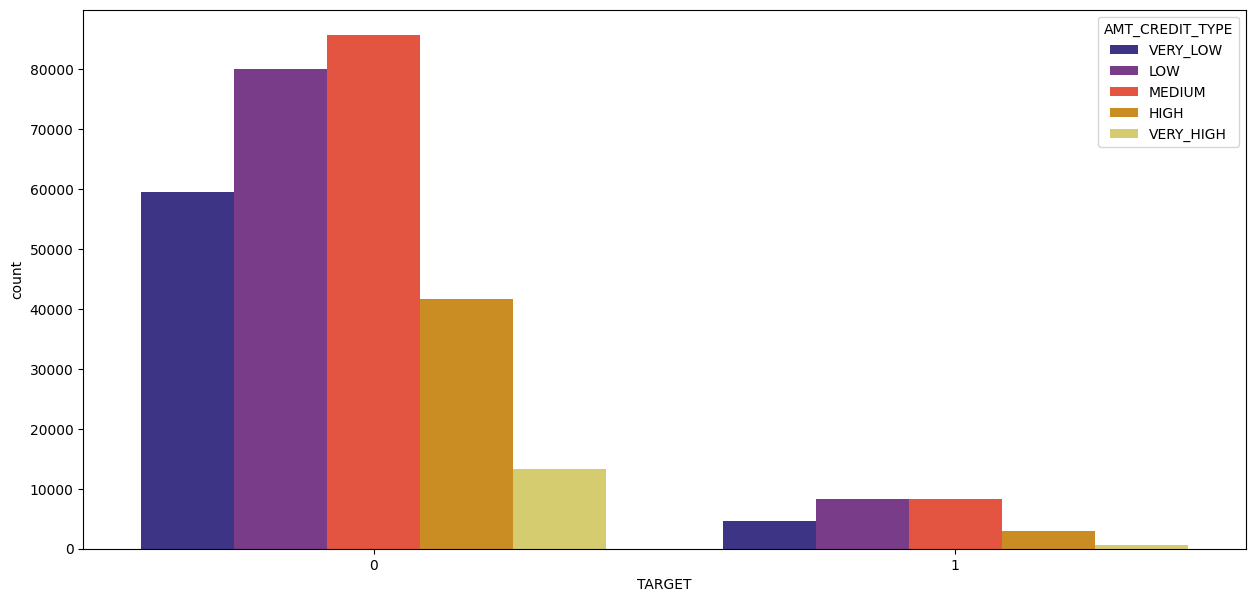

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(x=df.TARGET,hue=df.AMT_CREDIT_TYPE,palette='CMRmap')

Most of the clients applied for Medium Credit Amount of the loan for both Defaulters and Non-defaulters.

Clients applying for medium and low credit are at high risk of default.

<Axes: xlabel='TARGET', ylabel='count'>

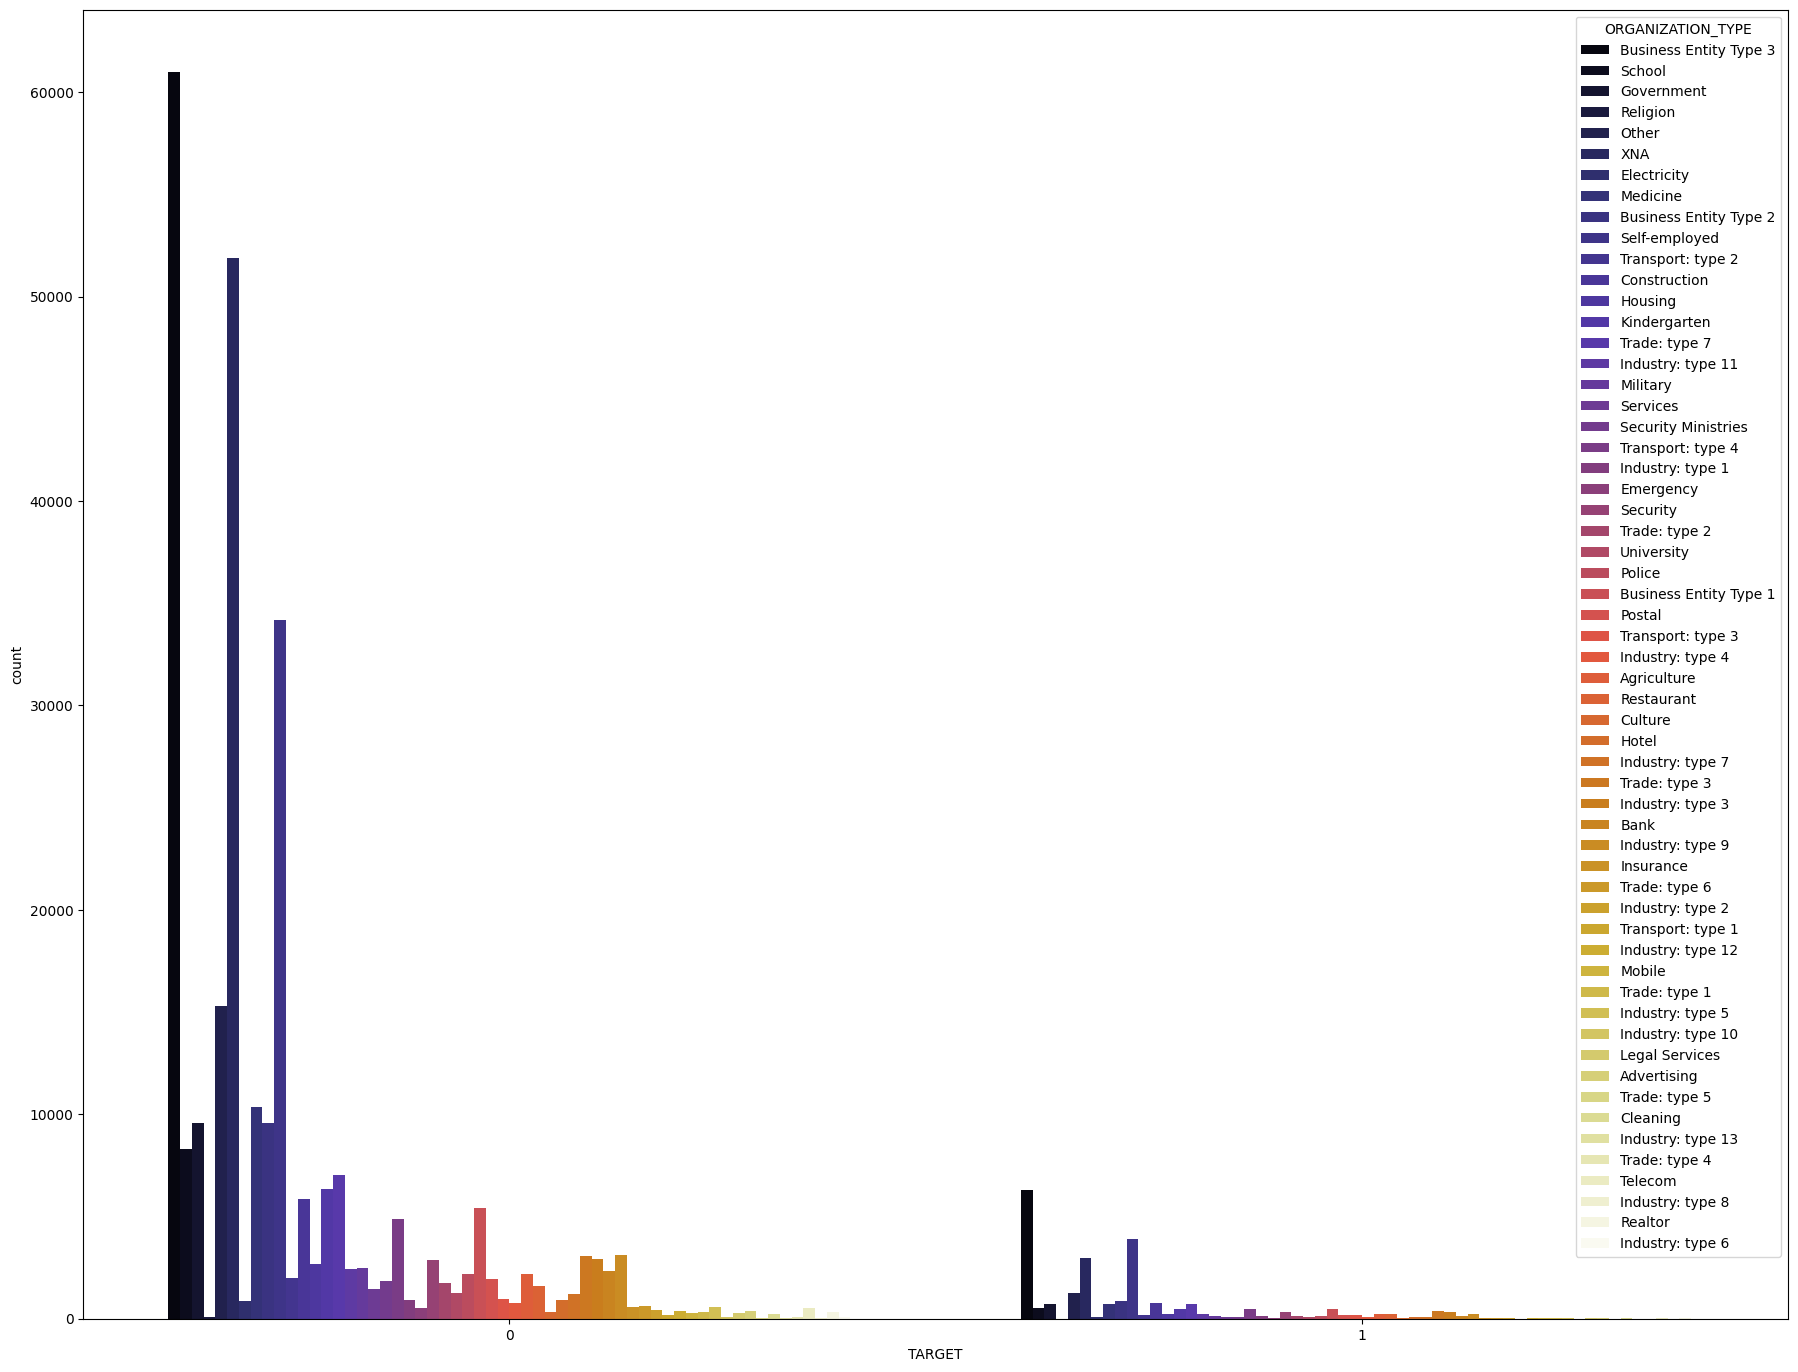

In [41]:
plt.figure(figsize=(22,17))
sns.countplot(x=df.TARGET,hue=df.ORGANIZATION_TYPE,palette='CMRmap')

Clients with ORGANIZATION_TYPE Business Entity Type 3, Self-employed, Other ,Medicine, Government,Business Entity Type 2 applied the most for the loan as compared to others.

Clients having ORGANIZATION_TYPE Industry: type 13, Trade: type 4, Trade: type 5, Industry: type 8 applied lower for the loan as compared to others.

<Axes: xlabel='TARGET', ylabel='count'>

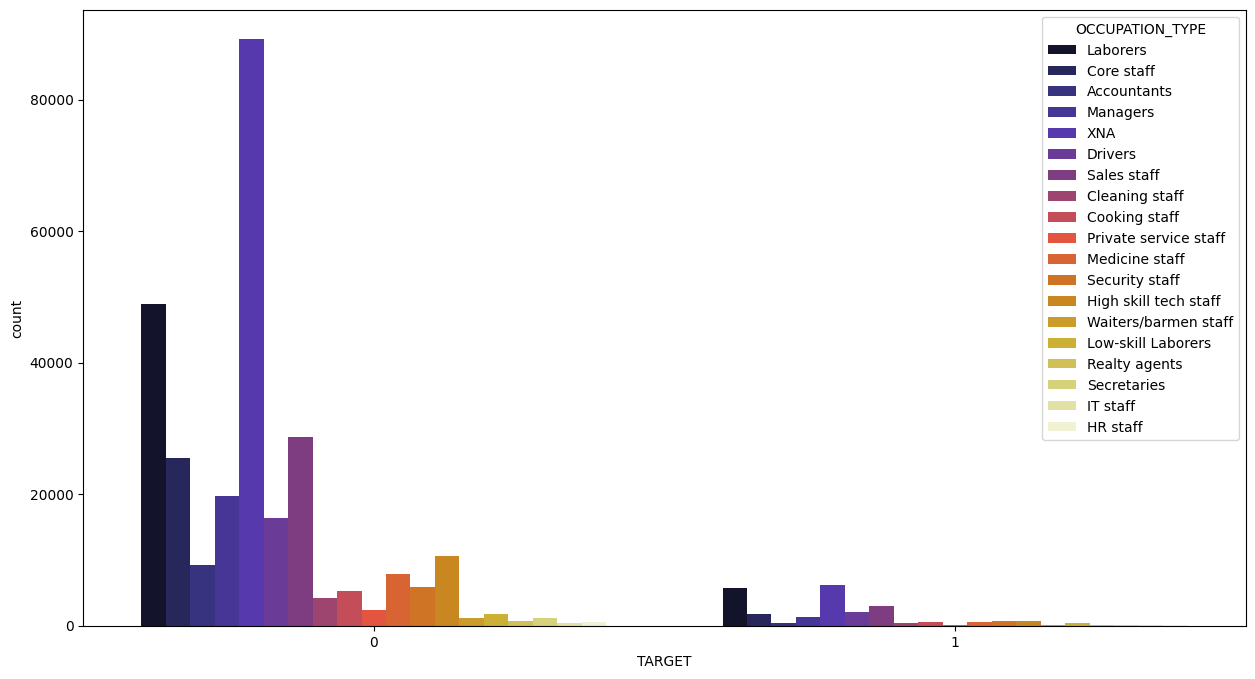

In [42]:
plt.figure(figsize=(15,8))
sns.countplot(x=df.TARGET,hue=df.OCCUPATION_TYPE,palette='CMRmap')

                  Distribution amongst Non-defaulter and Defaulter for NAME_TYPE_SUITE


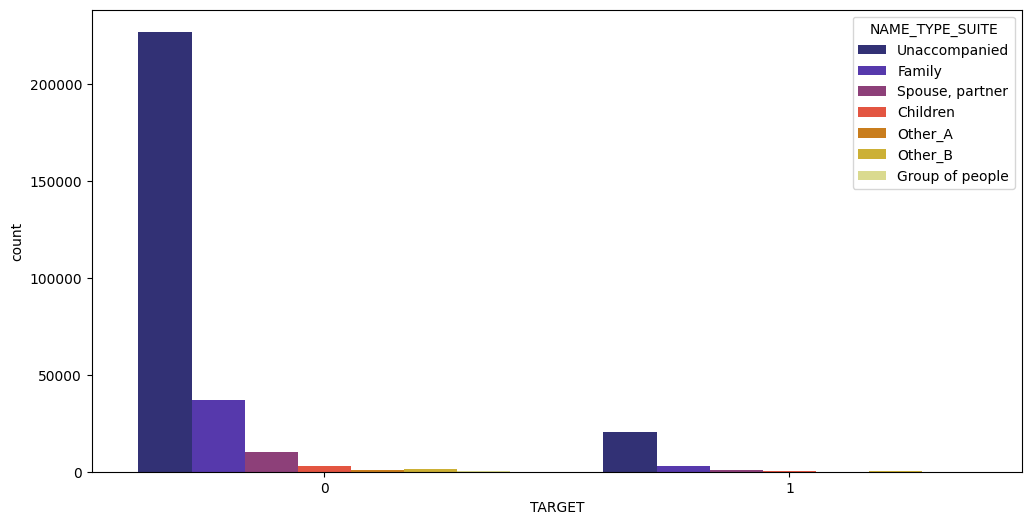

                  Distribution amongst Non-defaulter and Defaulter for NAME_INCOME_TYPE


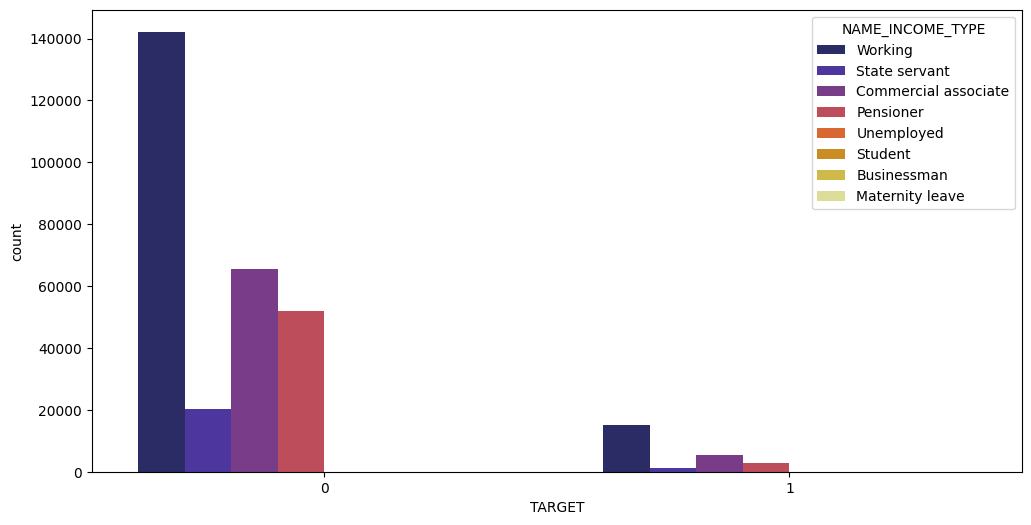

                  Distribution amongst Non-defaulter and Defaulter for NAME_EDUCATION_TYPE


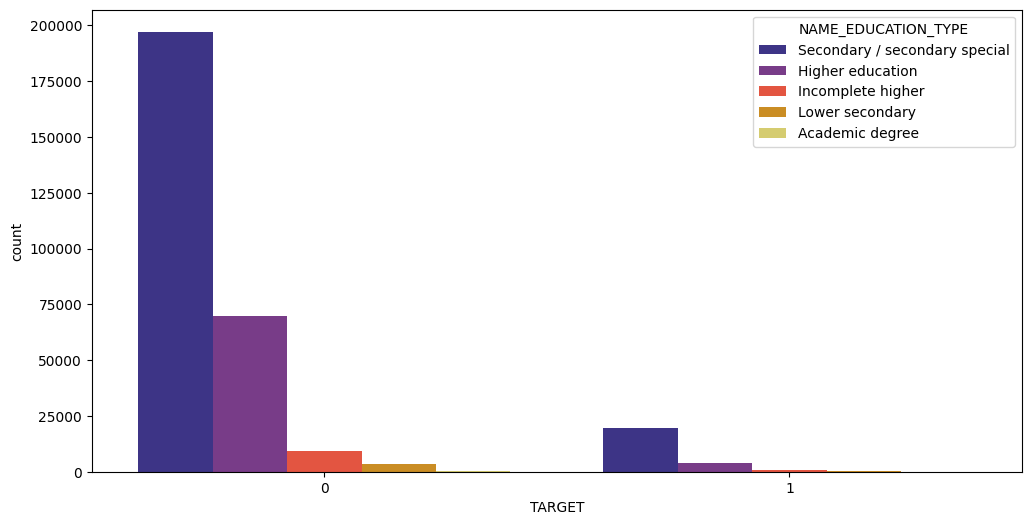

                  Distribution amongst Non-defaulter and Defaulter for NAME_FAMILY_STATUS


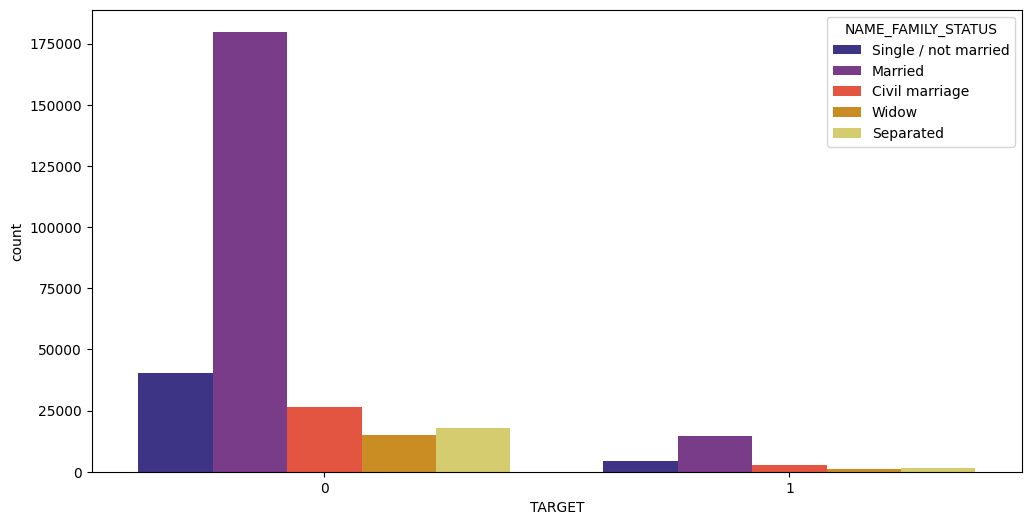

In [43]:
for i in range(11,15):
    plt.figure(figsize=(12,6))
    sns.countplot(x=df.TARGET,hue=df[df.columns[i]],palette = 'CMRmap')
    plt.title(print("                  Distribution amongst Non-defaulter and Defaulter for",(df.columns[i])))
    plt.show()

NAME_TYPE_SUIT : Most of the clients were accompanied while applying for the loan and with few clients a family member was accompanying for both Defaulters and Non-Defaulters.
But who was accompanying client while applying for the loan doesn't impact on the default.Also both the populations have same proportions.

NAME_INCOME_TYPE: Clients who applied for loans were getting income by Working,Commercial associate and Pensioner are more likely to apply for the loan, highest being the Working class category . Businessman, students and Unemployedless likely to apply for loan . Working category have high risk to default. State Servant is at Minimal risk to default.

NAME_EDUCATION_TYPE: Clients having education Secondary or Secondary Special are more likey to apply for the loan. Clients having education Secondary or Secondary Special have higher risk to default.Other education types have minimal risk.

NAME_FAMILY_STATUS : Married Clients seems to be applied most for the loan compared to others for both Defaulters and Non-Defaulters. In case of Defaulters,Clients having single relationship are less risky In case of Defaulters, Widows shows Minimal risk.

In [44]:
Target0 = df.loc[df["TARGET"]==0]
Target1 = df.loc[df["TARGET"]==1]

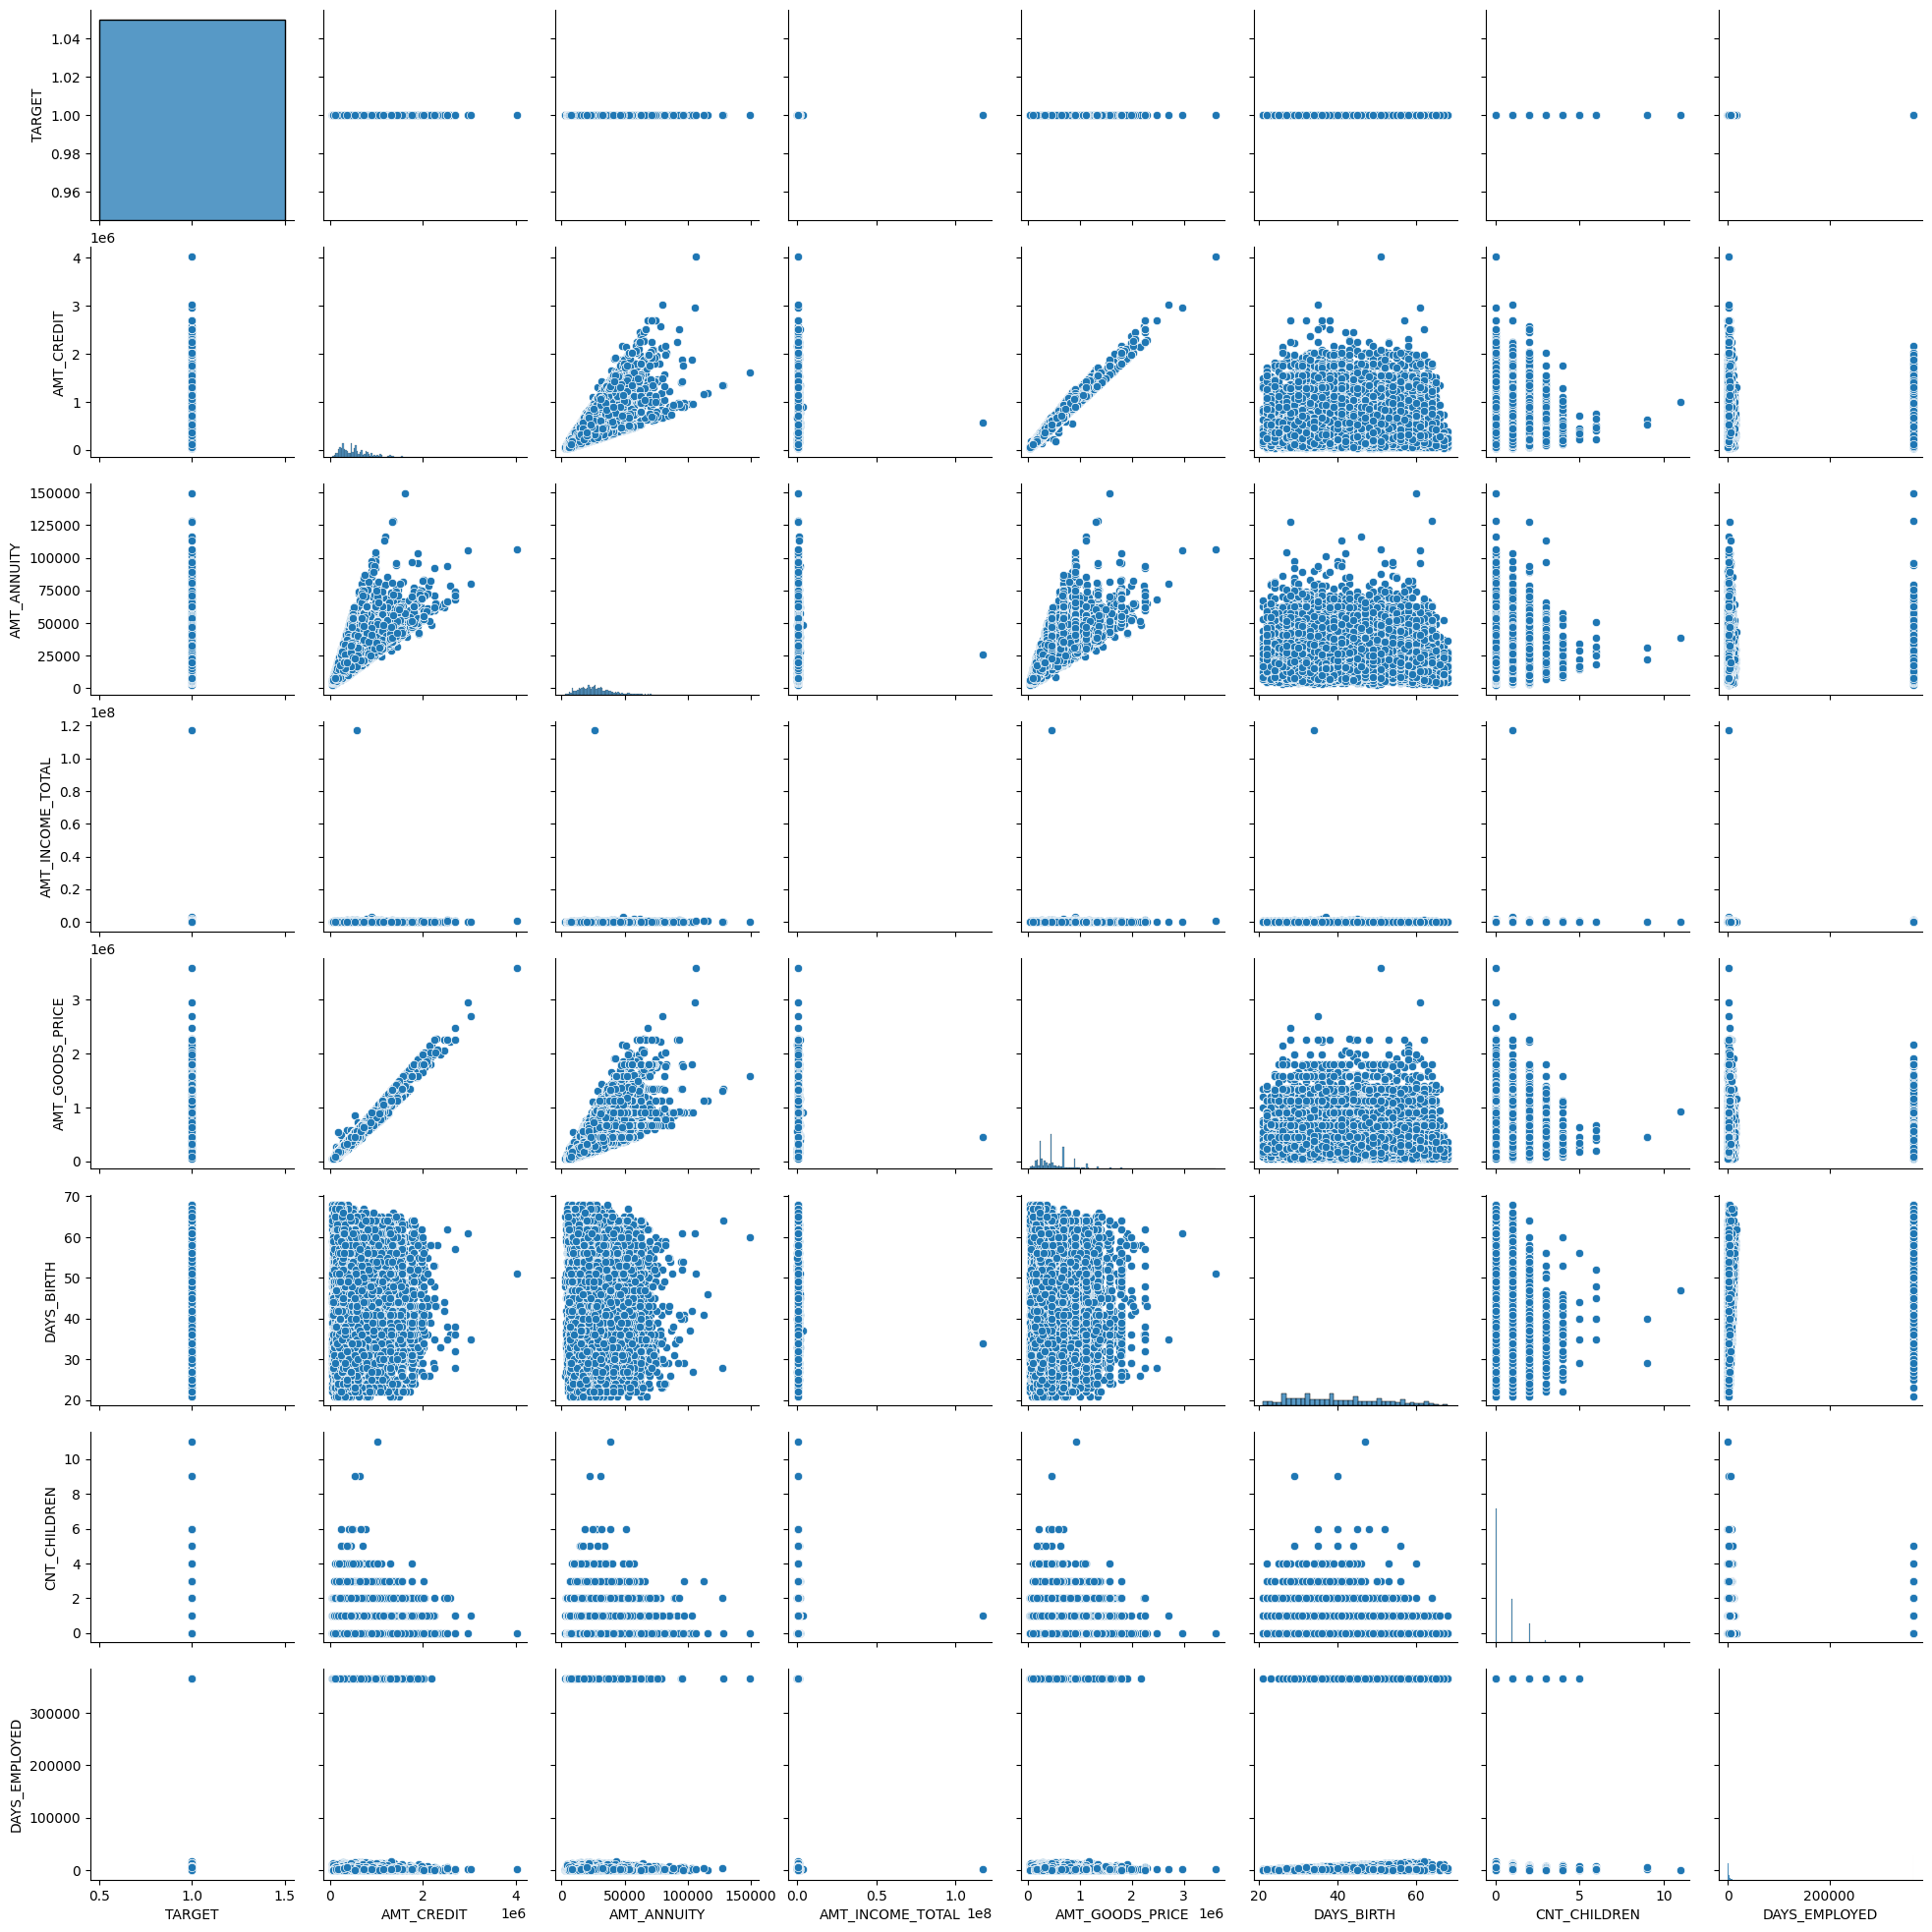

In [45]:
#Pairplot for Target 1 (Loan-Payment Difficulties)'
pair = Target1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)
plt.show()

AMT_CREDIT and AMT_GOODS_PRICE are highly correlated variables for both defaulters and non - defaulters. So as the home price increases the loan amount also increases

AMT_CREDIT and AMT_ANNUITY (EMI) are highly correlated variables for both defaulters and non - defaulters . So as the home price increases the EMI amount also increases which is logical

All three variables AMT_CREDIT, AMT_GOODS_PRICE and AMT_ANNUITY are highly correlated for both defaulters and non-defaulters, which might not give a good indicator for defaulter detection

# Encoding  of categorical variables

In [46]:
#Categorical Columns
cat_cols = df.select_dtypes(include = 'object')

In [47]:
cat_cols

,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services
307507,Cash loans,F,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,XNA,MONDAY,XNA
307508,Cash loans,F,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School
307509,Cash loans,F,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1


In [48]:
# encoding FLAG_OWN_CAR,FLAG_OWN_REALTY,CODE_GENDER
df['FLAG_OWN_CAR'] = np.where(df['FLAG_OWN_CAR']=='Y', 1 , 0)
df['FLAG_OWN_REALTY'] = np.where(df['FLAG_OWN_REALTY']=='Y', 1 , 0)
df['CODE_GENDER'] = np.where(df['CODE_GENDER']=='M', 1 , 0)

In [49]:
print(df['NAME_CONTRACT_TYPE'].unique())

['Cash loans' 'Revolving loans']


In [50]:
print(df['NAME_TYPE_SUITE'].unique())

['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']


In [51]:
print(df['NAME_INCOME_TYPE'].unique())

['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']


In [52]:
print(df['NAME_EDUCATION_TYPE'].unique())

['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


In [53]:
print(df['NAME_FAMILY_STATUS'].unique())

['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']


In [54]:
print(df['NAME_HOUSING_TYPE'].unique())

['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


In [55]:
print(df['OCCUPATION_TYPE'].unique())

['Laborers' 'Core staff' 'Accountants' 'Managers' 'XNA' 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']


In [56]:
print(df['WEEKDAY_APPR_PROCESS_START'].unique())

['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']


In [57]:
print(df['ORGANIZATION_TYPE'].unique())

['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Police' 'Business Entity Type 1'
 'Postal' 'Transport: type 3' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Culture' 'Hotel' 'Industry: type 7' 'Trade: type 3'
 'Industry: type 3' 'Bank' 'Industry: type 9' 'Insurance' 'Trade: type 6'
 'Industry: type 2' 'Transport: type 1' 'Industry: type 12' 'Mobile'
 'Trade: type 1' 'Industry: type 5' 'Industry: type 10' 'Legal Services'
 'Advertising' 'Trade: type 5' 'Cleaning' 'Industry: type 13'
 'Trade: type 4' 'Telecom' 'Industry: type 8' 'Realtor' 'Industry: type 6']


In [58]:
# encoding the other columns
data= pd.get_dummies(df, columns = ['ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START','OCCUPATION_TYPE','NAME_HOUSING_TYPE',
                                                   'NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','NAME_TYPE_SUITE','NAME_CONTRACT_TYPE'
                                                    ])

In [59]:
cat_cols = data.select_dtypes(include = 'category')
cat_cols

,AMT_INCOME_TYPE,AMT_CREDIT_TYPE,AGE_GROUP
0,MEDIUM,LOW,Very_Young
1,HIGH,HIGH,Middle_Age
2,VERY_LOW,VERY_LOW,Middle_Age
3,LOW,LOW,Middle_Age
4,LOW,LOW,Middle_Age
...,...,...,...
307506,MEDIUM,VERY_LOW,Very_Young
307507,VERY_LOW,LOW,Middle_Age
307508,MEDIUM,MEDIUM,Middle_Age
307509,MEDIUM,LOW,Young


In [60]:
print(data['AMT_INCOME_TYPE'].unique())

['MEDIUM', 'HIGH', 'VERY_LOW', 'LOW', 'VERY_HIGH']
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']


In [61]:
print(data['AMT_CREDIT_TYPE'].unique())

['LOW', 'HIGH', 'VERY_LOW', 'VERY_HIGH', 'MEDIUM']
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']


In [62]:
print(data['AGE_GROUP'].unique())

['Very_Young', 'Middle_Age', 'Young', 'Senior_Citizen']
Categories (4, object): ['Very_Young' < 'Young' < 'Middle_Age' < 'Senior_Citizen']


In [63]:
# encoding ordinal categorical columns
data['AMT_INCOME_TYPE'] = data['AMT_INCOME_TYPE'].map({'VERY_LOW': 0, 'LOW': 1,'MEDIUM': 2,'HIGH': 3,'VERY_HIGH': 4})
data['AMT_CREDIT_TYPE'] = data['AMT_CREDIT_TYPE'].map({'VERY_LOW': 0, 'LOW': 1,'MEDIUM': 2,'HIGH': 3,'VERY_HIGH': 4})
data['AGE_GROUP'] = data['AGE_GROUP'].map({'Very_Young': 0, 'Young': 1,'Middle_Age': 2,'Senior_Citizen': 3})

In [64]:
data["AMT_INCOME_TYPE"] = data["AMT_INCOME_TYPE"].astype("int")
data["AMT_CREDIT_TYPE"] = data["AMT_CREDIT_TYPE"].astype("int")
data["AGE_GROUP"] = data["AGE_GROUP"].astype("int")

In [65]:
data

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans
0,100002,1,1,0,0,0,202500.0,406597.5,24700.5,351000.0,...,1,0,0,0,0,0,0,1,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,1,0,0,0,0,0,1,0
2,100004,0,1,0,0,0,67500.0,135000.0,6750.0,135000.0,...,1,0,0,0,0,0,0,1,0,1
3,100006,0,0,0,0,0,135000.0,312682.5,29686.5,297000.0,...,1,0,0,0,0,0,0,1,1,0
4,100007,0,1,0,0,0,121500.0,513000.0,21865.5,513000.0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1,0,0,0,157500.0,254700.0,27558.0,225000.0,...,1,0,0,0,0,0,0,1,1,0
307507,456252,0,0,0,0,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,0,0,0,1,1,0
307508,456253,0,0,0,0,0,153000.0,677664.0,29979.0,585000.0,...,1,0,0,0,0,0,0,1,1,0
307509,456254,1,0,0,0,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0,0,0,1,1,0


# Independent and dependent variable and Train_Test Split

In [66]:
X=data.loc[:, data.columns != 'TARGET']
Y=data["TARGET"]
print(X.shape,Y.shape)

(304531, 183) (304531,)


In [67]:
#Importing train_test_split:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.80,test_size=0.20,random_state=42)
#80% data to be taken as training data and rest for testing to check accuracy

# Oversampling

In [68]:
import numpy as np
from imblearn.over_sampling import SMOTE

In [69]:
# Create an instance of SMOTE
smote = SMOTE()

# Apply SMOTE to oversample the minority class
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)

In [70]:
# Check the class distribution before oversampling
unique_classes, counts = np.unique(Y, return_counts=True)
print("Class distribution before SMOTE:", dict(zip(unique_classes, counts)))


Class distribution before SMOTE: {0: 279864, 1: 24667}


In [71]:
# Check the class distribution after oversampling
unique_classes_resampled, counts_resampled = np.unique(Y_resampled, return_counts=True)
print("Class distribution after SMOTE:", dict(zip(unique_classes_resampled, counts_resampled)))

Class distribution after SMOTE: {0: 223945, 1: 223945}


# Fitting Model  Using two independent variable .

In [72]:
Y_resampled=Y_resampled.to_frame()

In [73]:
# creating dependent and independent variables.
X1= X_resampled [['AMT_INCOME_TOTAL','AMT_CREDIT']].reset_index(drop=True)
Y1= Y_resampled ["TARGET"]
print(X1.shape,Y1.shape)

(447890, 2) (447890,)


In [74]:
X1_test=X_test[['AMT_INCOME_TOTAL','AMT_CREDIT']].reset_index(drop=True)

In [75]:
import pandas as pd
import statsmodels.api as sm

In [76]:
model1= sm.Logit(Y1, X1)
result1 = model1.fit()

Optimization terminated successfully.
         Current function value: 0.692575
         Iterations 4


In [77]:
# Print model summary
print(result1.summary())

                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               447890
Model:                          Logit   Df Residuals:                   447888
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:               0.0008251
Time:                        11:32:29   Log-Likelihood:            -3.1020e+05
converged:                       True   LL-Null:                   -3.1045e+05
Covariance Type:            nonrobust   LLR p-value:                1.969e-113
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
AMT_INCOME_TOTAL  1.284e-07    2.7e-08      4.758      0.000    7.55e-08    1.81e-07
AMT_CREDIT       -1.229e-07   7.45e-09    -16.496      0.000   -1.38e-07   -1.08e-07


In [78]:
X1_test

,AMT_INCOME_TOTAL,AMT_CREDIT
0,225000.0,1436850.0
1,135000.0,382500.0
2,112500.0,523152.0
3,157500.0,180000.0
4,90000.0,338832.0
...,...,...
60902,126000.0,584766.0
60903,76500.0,1078200.0
60904,247500.0,352044.0
60905,54000.0,254700.0


In [79]:
Y1_prediction=result1.predict(X1_test)

In [80]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [82]:
#Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test,Y1_prediction)

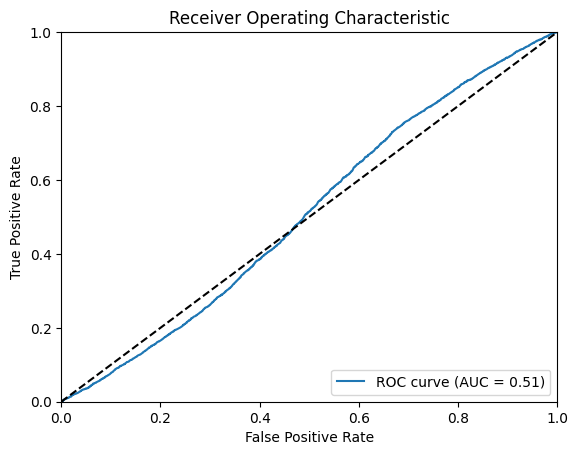

In [83]:
# Compute the AUC (Area Under the Curve)
auc = roc_auc_score(Y_test,Y1_prediction)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line (random classifier)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [84]:
# Find the index of the optimal threshold point based on Youden's index
youden_index = tpr - fpr
optimal_threshold_index = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_threshold_index]
optimal_tpr = tpr[optimal_threshold_index]
optimal_fpr = fpr[optimal_threshold_index]
print(f"Optimal Threshold: {optimal_threshold}")
print(f"Optimal TPR: {optimal_tpr}")
print(f"Optimal FPR: {optimal_fpr}")

Optimal Threshold: 0.48290731876442333
Optimal TPR: 0.7558139534883721
Optimal FPR: 0.6915359716733132


In [85]:
# Make predictions
binary_predictions = (Y1_prediction >=0.48227245691228465).astype(int)

# Calculate classification metrics
confusion = confusion_matrix(Y_test, binary_predictions)
precision = precision_score(Y_test, binary_predictions)
recall = recall_score(Y_test, binary_predictions)
f1 = f1_score(Y_test, binary_predictions)

# Print the metrics
print("Confusion Matrix:")
print(confusion)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Confusion Matrix:
[[16273 39646]
 [ 1146  3842]]
Precision: 0.08834621044885946
Recall: 0.7702485966319166
F1-Score: 0.15851142833567125


# Feature Selection using Lasso Regularzation

In [86]:
### Apply Feature Selection

# The bigger the alpha the less features that will be selected.
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_resampled, Y_resampled)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [87]:
feature_sel_model.get_support()

array([False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False,  True,  True, False,  True, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,

In [88]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_resampled.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_resampled.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 183
selected features: 44


In [89]:
X_resampled1=X_resampled[selected_feat]

In [90]:
# Variance Inflation Factor
X3=X_resampled1
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['variable'] = X3.columns
vif

,VIF,variable
0,1.692373,CODE_GENDER
1,5.916897,CNT_CHILDREN
2,50.860769,DAYS_BIRTH
3,1.332248,FLAG_PHONE
4,41.325074,CNT_FAM_MEMBERS
5,18.269130,REGION_RATING_CLIENT
6,14.636634,HOUR_APPR_PROCESS_START
7,3.301932,REG_CITY_NOT_WORK_CITY
8,3.074793,LIVE_CITY_NOT_WORK_CITY
9,8.547882,EXT_SOURCE_2


In [91]:
# Step 3: Filter variables with VIF > 10
selected_variables1 = vif[vif['VIF'] >10]['variable']
# Print the selected variables
print(selected_variables1)

2                  DAYS_BIRTH
4             CNT_FAM_MEMBERS
5        REGION_RATING_CLIENT
6     HOUR_APPR_PROCESS_START
16                  AGE_GROUP
Name: variable, dtype: object


In [92]:
X_resampled2=X_resampled1.drop(columns=["DAYS_BIRTH",'CNT_FAM_MEMBERS'],axis=1)

In [93]:
X_resampled2

,CODE_GENDER,CNT_CHILDREN,FLAG_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,...,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Unaccompanied,NAME_CONTRACT_TYPE_Revolving loans
0,0,0,0,3,13,0,0,0.649616,0.504681,17.000000,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,2,14,0,0,0.632292,0.510853,2451.000000,...,0,0,0,1,1,0,0,0,1,0
2,0,0,0,2,15,0,0,0.557213,0.510853,2.000000,...,0,0,0,1,0,0,0,1,0,0
3,1,0,0,2,8,1,1,0.360840,0.799297,0.000000,...,1,0,0,1,0,0,1,1,0,0
4,0,0,0,2,5,1,0,0.349587,0.572683,1673.000000,...,1,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447885,0,0,0,2,15,1,0,0.324830,0.453626,535.194685,...,0,0,0,1,0,0,1,0,1,0
447886,0,0,0,2,12,1,0,0.451566,0.425967,167.198343,...,0,0,0,1,0,0,0,0,1,0
447887,0,0,0,2,12,0,0,0.610067,0.121589,944.280679,...,0,0,0,0,0,0,1,0,0,0
447888,0,0,0,2,8,0,0,0.444811,0.658659,1101.661226,...,0,0,1,0,0,0,0,0,0,0


In [94]:
model2= sm.Logit(Y_resampled,X_resampled2)
result2 = model2.fit()

Optimization terminated successfully.
         Current function value: 0.254504
         Iterations 8


In [95]:
# Print model summary
print(result2.summary())

                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               447890
Model:                          Logit   Df Residuals:                   447848
Method:                           MLE   Df Model:                           41
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.6328
Time:                        11:40:13   Log-Likelihood:            -1.1399e+05
converged:                       True   LL-Null:                   -3.1045e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
CODE_GENDER                                          -0.0274      0.013     -2.107      0.035      -0.053      -0.002
CNT_CHILDREN  

In [96]:
X2_test=X_test[selected_feat]

In [97]:
X2_test=X2_test.drop(columns=["DAYS_BIRTH",'CNT_FAM_MEMBERS'],axis=1)

In [98]:
X2_test

,CODE_GENDER,CNT_CHILDREN,FLAG_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,...,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Unaccompanied,NAME_CONTRACT_TYPE_Revolving loans
183431,0,0,1,2,19,0,0,0.751620,0.510853,775.0,...,1,0,0,1,0,0,1,0,1,0
83128,1,0,0,2,11,0,0,0.552119,0.510853,1358.0,...,0,0,1,0,1,0,0,0,1,0
172385,0,0,0,2,10,1,1,0.698720,0.477649,2101.0,...,0,0,1,0,1,0,0,0,1,0
4949,1,0,0,2,11,1,1,0.701053,0.510853,471.0,...,0,0,0,1,0,0,1,0,1,1
120353,0,1,0,2,9,1,1,0.640499,0.510853,667.0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57967,0,0,1,1,17,0,0,0.625965,0.510853,138.0,...,1,0,0,0,1,0,0,0,1,0
185417,0,0,0,2,11,0,0,0.690206,0.766234,1607.0,...,0,0,0,1,0,1,0,0,1,0
140705,1,0,0,2,14,1,1,0.514900,0.510853,1127.0,...,1,0,0,1,0,1,0,0,0,0
268491,0,0,1,2,9,0,0,0.322714,0.510853,626.0,...,0,0,0,1,0,0,1,0,1,0


In [99]:
Y2_prediction=result2.predict(X2_test)

In [100]:
Y2_prediction

183431    0.414207
83128     0.029548
172385    0.018152
4949      0.054894
120353    0.109659
            ...   
57967     0.018083
185417    0.053409
140705    0.092496
268491    0.018396
3825      0.099543
Length: 60907, dtype: float64

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [102]:
#Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test,Y2_prediction)

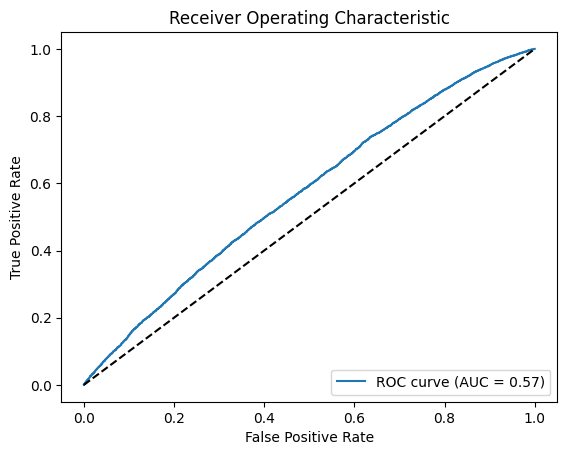

In [103]:
# Compute the AUC (Area Under the Curve)
auc = roc_auc_score(Y_test,Y2_prediction)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [104]:
# Find the index of the optimal threshold point based on Youden's index
youden_index = tpr - fpr
optimal_threshold_index = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_threshold_index]
optimal_tpr = tpr[optimal_threshold_index]
optimal_fpr = fpr[optimal_threshold_index]
print(f"Optimal Threshold: {optimal_threshold}")
print(f"Optimal TPR: {optimal_tpr}")
print(f"Optimal FPR: {optimal_fpr}")

Optimal Threshold: 0.05585607093769923
Optimal TPR: 0.7385725741780272
Optimal FPR: 0.6359555786047676


In [105]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [106]:
# Make predictions
binary_predictions = (Y2_prediction >= 0.05634444642942227).astype(int)

# Calculate classification metrics
confusion = confusion_matrix(Y_test, binary_predictions)
precision = precision_score(Y_test, binary_predictions)
recall = recall_score(Y_test, binary_predictions)
f1 = f1_score(Y_test, binary_predictions)

# Print the metrics
print("Confusion Matrix:")
print(confusion)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Confusion Matrix:
[[20490 35429]
 [ 1321  3667]]
Precision: 0.09379476161244117
Recall: 0.7351643945469126
F1-Score: 0.16636421377370475


# Feature Selection using the domain knowledge 

In [107]:
x5=data[['CODE_GENDER','NAME_CONTRACT_TYPE_Revolving loans','CNT_CHILDREN','AMT_INCOME_TOTAL','NAME_EDUCATION_TYPE_Academic degree','NAME_EDUCATION_TYPE_Higher education',
         'NAME_EDUCATION_TYPE_Incomplete higher',
        'NAME_EDUCATION_TYPE_Lower secondary','NAME_EDUCATION_TYPE_Secondary / secondary special','NAME_FAMILY_STATUS_Civil marriage',
         'NAME_FAMILY_STATUS_Married','NAME_FAMILY_STATUS_Separated','NAME_FAMILY_STATUS_Single / not married','NAME_FAMILY_STATUS_Widow',
         'NAME_HOUSING_TYPE_Co-op apartment','NAME_HOUSING_TYPE_House / apartment','NAME_HOUSING_TYPE_Municipal apartment',
         'NAME_HOUSING_TYPE_Office apartment','NAME_HOUSING_TYPE_Rented apartment','NAME_HOUSING_TYPE_With parents',
         'DAYS_REGISTRATION','DAYS_ID_PUBLISH',
         'ORGANIZATION_TYPE_Business Entity Type 3','ORGANIZATION_TYPE_Self-employed',
         'FLAG_DOCUMENT_3','FLAG_DOCUMENT_8','DEF_60_CNT_SOCIAL_CIRCLE',
         'DAYS_LAST_PHONE_CHANGE','OCCUPATION_TYPE_Core staff','OCCUPATION_TYPE_Laborers','OCCUPATION_TYPE_Sales staff',
         'OCCUPATION_TYPE_XNA'
        
        ]]

In [108]:
x5

,CODE_GENDER,NAME_CONTRACT_TYPE_Revolving loans,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,...,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Self-employed,FLAG_DOCUMENT_3,FLAG_DOCUMENT_8,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_XNA
0,1,0,0,202500.0,0,0,0,0,1,0,...,1,0,1,0,2.0,1134.0,0,1,0,0
1,0,0,0,270000.0,0,1,0,0,0,0,...,0,0,1,0,0.0,828.0,1,0,0,0
2,1,1,0,67500.0,0,0,0,0,1,0,...,0,0,0,0,0.0,815.0,0,1,0,0
3,0,0,0,135000.0,0,0,0,0,1,1,...,1,0,1,0,0.0,617.0,0,1,0,0
4,1,0,0,121500.0,0,0,0,0,1,0,...,0,0,0,1,0.0,1106.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1,0,0,157500.0,0,0,0,0,1,0,...,0,0,0,1,0.0,273.0,0,0,1,0
307507,0,0,0,72000.0,0,0,0,0,1,0,...,0,0,1,0,0.0,0.0,0,0,0,1
307508,0,0,0,153000.0,0,1,0,0,0,0,...,0,0,1,0,0.0,1909.0,0,0,0,0
307509,0,0,0,171000.0,0,0,0,0,1,0,...,0,0,1,0,0.0,322.0,0,1,0,0


In [109]:
Y=data["TARGET"]
print(x5.shape,Y.shape)

(304531, 32) (304531,)


In [110]:
#Importing train_test_split:
from sklearn.model_selection import train_test_split
X5_train,X5_test,Y5_train,Y5_test=train_test_split(x5,Y,train_size=0.80,test_size=0.20,random_state=42)
#80% data to be taken as training data and rest for testing to check accuracy

In [111]:
# Create an instance of SMOTE
smote = SMOTE()

# Apply SMOTE to oversample the minority class
X5_resampled, Y5_resampled = smote.fit_resample(X5_train, Y_train)

In [112]:
# Check the class distribution before oversampling
unique_classes, counts = np.unique(Y, return_counts=True)
print("Class distribution before SMOTE:", dict(zip(unique_classes, counts)))

Class distribution before SMOTE: {0: 279864, 1: 24667}


In [113]:
# Check the class distribution after oversampling
unique_classes_resampled, counts_resampled = np.unique(Y5_resampled, return_counts=True)
print("Class distribution after SMOTE:", dict(zip(unique_classes_resampled, counts_resampled)))

Class distribution after SMOTE: {0: 223945, 1: 223945}


In [114]:
import pandas as pd
import statsmodels.api as sm

In [115]:
model5= sm.Logit(Y5_resampled,X5_resampled)
result5 = model5.fit()

Optimization terminated successfully.
         Current function value: 0.439647
         Iterations 8


In [116]:
# Variance Inflation Factor
X6=X5_resampled
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['variable'] = X6.columns
vif

,VIF,variable
0,1.604376,CODE_GENDER
1,1.287053,NAME_CONTRACT_TYPE_Revolving loans
2,1.404480,CNT_CHILDREN
3,1.165323,AMT_INCOME_TOTAL
4,1.002986,NAME_EDUCATION_TYPE_Academic degree
5,2.282162,NAME_EDUCATION_TYPE_Higher education
6,1.179391,NAME_EDUCATION_TYPE_Incomplete higher
7,1.068579,NAME_EDUCATION_TYPE_Lower secondary
8,5.423938,NAME_EDUCATION_TYPE_Secondary / secondary special
9,1.385350,NAME_FAMILY_STATUS_Civil marriage


In [117]:
# Step 3: Filter variables with VIF > 10
selected_variables3 = vif[vif['VIF'] >10]['variable']
# Print the selected variables
print(selected_variables3)

Series([], Name: variable, dtype: object)


In [118]:
# Print model summary
print(result5.summary())

                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               447890
Model:                          Logit   Df Residuals:                   447858
Method:                           MLE   Df Model:                           31
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.3657
Time:                        11:42:36   Log-Likelihood:            -1.9691e+05
converged:                       True   LL-Null:                   -3.1045e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
CODE_GENDER                                          -0.2529      0.010    -26.486      0.000      -0.272      -0.234
NAME_CONTRACT_

In [119]:
X5_test

,CODE_GENDER,NAME_CONTRACT_TYPE_Revolving loans,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,...,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Self-employed,FLAG_DOCUMENT_3,FLAG_DOCUMENT_8,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_XNA
183431,0,0,0,225000.0,0,0,0,0,1,0,...,1,0,1,0,0.0,775.0,0,0,0,0
83128,1,0,0,135000.0,0,1,0,0,0,0,...,0,0,0,0,0.0,1358.0,0,0,1,0
172385,0,0,0,112500.0,0,1,0,0,0,0,...,0,0,1,0,0.0,2101.0,0,0,0,1
4949,1,1,0,157500.0,0,0,0,0,1,1,...,0,0,0,0,0.0,471.0,0,1,0,0
120353,0,0,1,90000.0,0,0,0,0,1,0,...,0,0,1,0,0.0,667.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57967,0,0,0,126000.0,0,0,1,0,0,0,...,0,0,0,0,0.0,138.0,1,0,0,0
185417,0,0,0,76500.0,0,0,0,0,1,0,...,0,0,0,0,0.0,1607.0,0,0,0,0
140705,1,0,0,247500.0,0,0,0,0,1,0,...,0,0,1,0,3.0,1127.0,0,1,0,0
268491,0,0,0,54000.0,0,0,0,0,1,0,...,0,0,1,0,0.0,626.0,0,0,0,1


In [120]:
Y5_prediction=result5.predict(X5_test)

In [121]:
Y5_prediction

183431    0.367420
83128     0.037253
172385    0.042273
4949      0.109040
120353    0.679052
            ...   
57967     0.040151
185417    0.571459
140705    0.786578
268491    0.082906
3825      0.063522
Length: 60907, dtype: float64

In [122]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [123]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [124]:
#Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test,Y2_prediction)

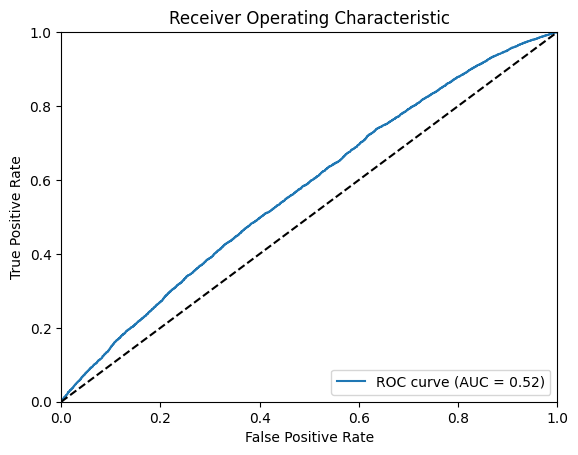

In [125]:
# Compute the AUC (Area Under the Curve)
auc = roc_auc_score(Y5_test,Y5_prediction)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line (random classifier)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [126]:
# Find the index of the optimal threshold point based on Youden's index
youden_index = tpr - fpr
optimal_threshold_index = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_threshold_index]
optimal_tpr = tpr[optimal_threshold_index]
optimal_fpr = fpr[optimal_threshold_index]
print(f"Optimal Threshold: {optimal_threshold}")
print(f"Optimal TPR: {optimal_tpr}")
print(f"Optimal FPR: {optimal_fpr}")


Optimal Threshold: 0.05585607093769923
Optimal TPR: 0.7385725741780272
Optimal FPR: 0.6359555786047676


In [127]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [128]:
# Make predictions
binary_predictions = (Y5_prediction >=  0.056405983880266804).astype(int)

# Calculate classification metrics
confusion = confusion_matrix(Y_test, binary_predictions)
precision = precision_score(Y_test, binary_predictions)
recall = recall_score(Y_test, binary_predictions)
f1 = f1_score(Y_test, binary_predictions)

# Print the metrics
print("Confusion Matrix:")
print(confusion)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Confusion Matrix:
[[12799 43120]
 [ 1006  3982]]
Precision: 0.08453993460999533
Recall: 0.7983159582999199
F1-Score: 0.15288923017853714


# Random Forest 

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Create a Random Forest classifier
clf.fit(X_resampled2,Y_resampled)  # Train the classifier on the training data

RandomForestClassifier(random_state=42)

In [131]:
y_pred12= clf.predict_proba(X2_test)

In [136]:
y_pred12=pd.DataFrame(y_pred12)
y_pred12

,1
0,0.04
1,0.09
2,0.05
3,0.04
4,0.04
...,...
60902,0.14
60903,0.03
60904,0.34
60905,0.03


In [134]:
#Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test,y_pred12)

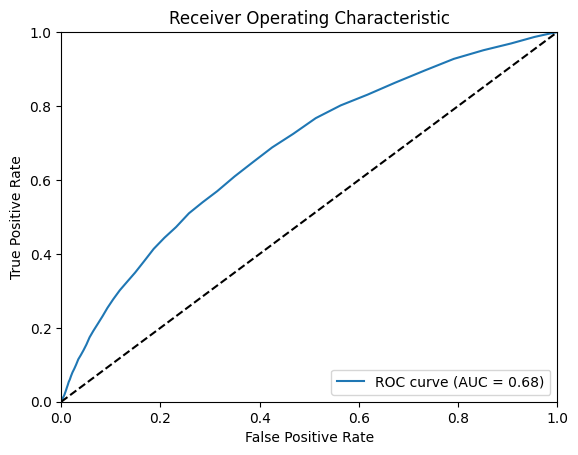

In [138]:
# Compute the AUC (Area Under the Curve)
auc = roc_auc_score(Y_test,y_pred12)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line (random classifier)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [139]:
# Find the index of the optimal threshold point based on Youden's index
youden_index = tpr - fpr
optimal_threshold_index = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_threshold_index]
optimal_tpr = tpr[optimal_threshold_index]
optimal_fpr = fpr[optimal_threshold_index]
print(f"Optimal Threshold: {optimal_threshold}")
print(f"Optimal TPR: {optimal_tpr}")
print(f"Optimal FPR: {optimal_fpr}")

Optimal Threshold: 0.12
Optimal TPR: 0.6880513231756215
Optimal FPR: 0.4251685473631503


In [142]:
# Make predictions
binary_predictions = (y_pred12 >= 0.12).astype(int)

# Calculate classification metrics
confusion = confusion_matrix(Y_test, binary_predictions)
precision = precision_score(Y_test, binary_predictions)
recall = recall_score(Y_test, binary_predictions)
f1 = f1_score(Y_test, binary_predictions)

# Print the metrics
print("Confusion Matrix:")
print(confusion)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Confusion Matrix:
[[32144 23775]
 [ 1556  3432]]
Precision: 0.1261440070570074
Recall: 0.6880513231756215
F1-Score: 0.2132008075788166
